# Demo_Projects_CNN_numbers_recognition_Benbhk

In this projec

## import

In [4]:
# importation of the datasets from tensorflow
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

# Loading the set

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

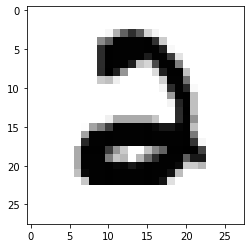

In [5]:
plt.imshow(X_train[82],cmap='gray_r')